# Regression 101

Nuestro primer ejemplo de regresión.

En este ejemplo no haremos nada muy complicado con otras bases de datos.

In [45]:
import numpy as np
from sklearn import linear_model
lr = linear_model.LinearRegression() #En sklearn asi llamamos a nuestros modelos
import pylab as plt
%matplotlib inline 
#again, this is only in jupyter notebooks

In [46]:
#Let's create some data
x = np.arange(0,10,1) #Data from 0 to 10 in steps of 1
print(x)
y = np.power(x,2)
print (y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


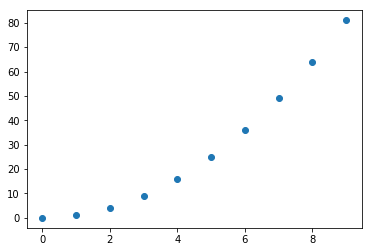

In [47]:
plt.scatter(x,y)

In [48]:
#lr.fit(x,y)#<-- This doesn't work!!
#We need to reshape from 1D to 2D vectors
x =x[:,None]
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
print (lr.coef_)
print (lr.intercept_)

[9.]
-11.999999999999993


The resulting weight is:

$y = 9x - 12$

In [50]:
predict_y = lr.predict(x)

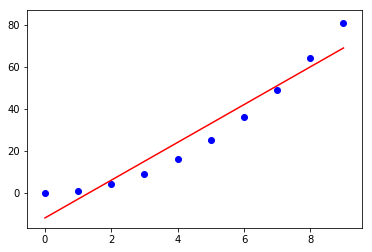

In [51]:
plt.plot(x, predict_y, c ='red')
plt.scatter(x, y, c ='blue')

In [52]:
lr.fit_intercept = False

In [53]:
lr.fit(x,y)
print (lr.coef_)
print (lr.intercept_)

[7.10526316]
0.0


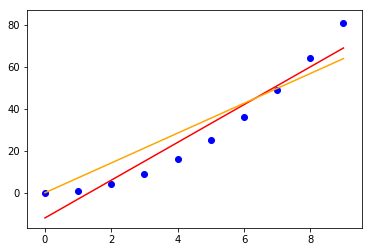

In [54]:
predict_y_2 = lr.predict(x)
plt.plot(x, predict_y, c ='red')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange')

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias = False)
x_2 = poly.fit_transform(x)
print (x_2)

[[ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]
 [ 7. 49.]
 [ 8. 64.]
 [ 9. 81.]]


In [56]:
lr.intercept_ = True
lr.fit(x_2,y)
print (lr.coef_)
print (lr.intercept_)

[1.00701636e-15 1.00000000e+00]
0.0


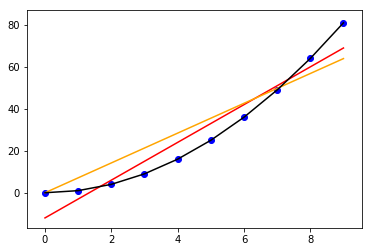

In [57]:
predict_y_3 = lr.predict(x_2)
plt.plot(x, predict_y, c ='red',label = 'First Attempt')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Second Attempt (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Different features')


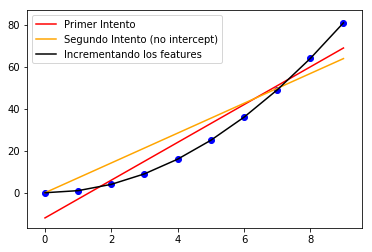

In [58]:
predict_y_3 = lr.predict(x_2)
plt.plot(x, predict_y, c ='red',label = 'Primer Intento')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Segundo Intento (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Incrementando los features')

plt.legend()

In [64]:
poly = PolynomialFeatures(3, include_bias = False)
x_3 = poly.fit_transform(x)
print (x_3)
print(y)
lr.intercept_ = True
lr.fit(x_3,y)
print (lr.coef_)
print (lr.intercept_)

[[  0.   0.   0.]
 [  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
[ 0  1  4  9 16 25 36 49 64 81]
[ 7.23695633e-15  1.00000000e+00 -3.28401228e-16]
0.0


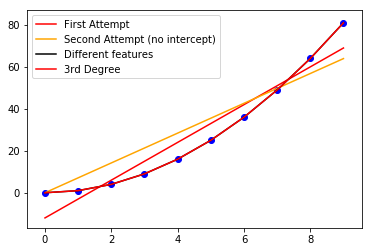

In [60]:
predict_y_4 = lr.predict(x_3)
plt.plot(x, predict_y, c ='red',label = 'First Attempt')
plt.scatter(x, y, c ='blue')
plt.plot(x, predict_y_2, c ='orange', label = 'Second Attempt (no intercept)')
plt.plot(x, predict_y_3, c ='black', label = 'Different features')
plt.plot(x, predict_y_4, c ='red', label = '3rd Degree')
plt.legend()

In [80]:
y_noise = np.random.rand(10)-0.5
y_n = y + 100*y_noise
print (y_n)

lr.fit(x_3,y_n)

print (lr.coef_)
print (lr.intercept_)

[-16.15911151   9.46521973 -16.49665614 -13.65999859 -28.01488747
  55.9991147   36.95387026  17.21034557 113.4247389   50.24913418]
[-22.07619451   7.73099478  -0.49294237]
0.0


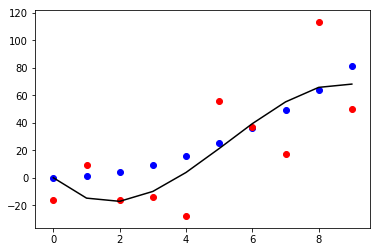

In [81]:
predict_y_n = lr.predict(x_3)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x, predict_y_n, c ='black', label = '3rd Degree')


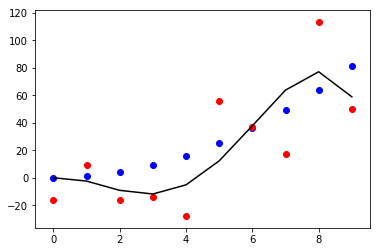

In [82]:
poly = PolynomialFeatures(5, include_bias = False)
x_5 = poly.fit_transform(x)
lr.fit(x_5,y_n)
predict_y_n = lr.predict(x_5)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x, predict_y_n, c ='black', label = '3rd Degree')

In [70]:
lr.coef_

array([ 1.13027486e+02, -6.65914678e+01,  1.57193547e+01, -1.56241139e+00,
        5.51099534e-02])

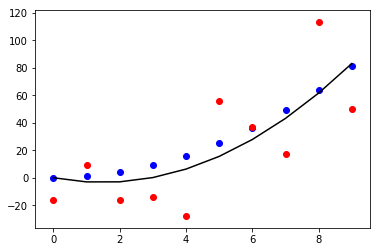

In [83]:
lr.fit(x_2,y_n)
predict_y_n = lr.predict(x_2)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x, predict_y_n, c ='black', label = '3rd Degree')